# Wellness Tourism Package : Descriptive Analysis And New Segment Prediction

# Data Exploration

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [3]:
warnings.filterwarnings("ignore")

In [5]:
# path = input("Enter the path of the directory with the data : ")
# os.chdir(path)
data = pd.read_csv("Travel.csv")

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [10]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
df = data.copy()

In [13]:
df['ProductPitched'].unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Cleaning

In [14]:
for prod_type in df['ProductPitched'].unique():
    df.loc[((df['ProductPitched']==prod_type)&(df['Age'].isna())), 'Age'] = int(df[df['ProductPitched']==prod_type]['Age'].mean())
    df.loc[((df['ProductPitched']==prod_type)&(df['DurationOfPitch'].isna())), 'DurationOfPitch'] = df[df['ProductPitched']==prod_type]['DurationOfPitch'].mean()
    df.loc[((df['ProductPitched']==prod_type)&(df['NumberOfTrips'].isna())), 'NumberOfTrips'] = int(df[df['ProductPitched']==prod_type]['NumberOfTrips'].mean())
    df.loc[((df['ProductPitched']==prod_type)&(df['MonthlyIncome'].isna())), 'MonthlyIncome'] = df[df['ProductPitched']==prod_type]['MonthlyIncome'].mean()
    df.loc[((df['ProductPitched']==prod_type)&(df['NumberOfFollowups'].isna())), 'NumberOfFollowups'] = int(df[df['ProductPitched']==prod_type]['NumberOfFollowups'].mode()[0])
    df.loc[((df['ProductPitched']==prod_type)&(df['PreferredPropertyStar'].isna())), 'PreferredPropertyStar'] = int(df[df['ProductPitched']==prod_type]['PreferredPropertyStar'].mode()[0])
    df.loc[((df['ProductPitched']==prod_type)&(df['NumberOfChildrenVisiting'].isna())), 'NumberOfChildrenVisiting'] = int(df[df['ProductPitched']==prod_type]['NumberOfChildrenVisiting'].mode()[0])
    
df['TypeofContact'].fillna("NA", inplace=True)
df['Gender'].replace('Fe Male', 'Female', inplace=True)

In [15]:
for prod_type in df['ProductPitched'].unique():
    
    income_q3 = np.percentile(df.loc[df['ProductPitched']==prod_type, "MonthlyIncome"], 75, interpolation = 'midpoint')
    duration_q3 = np.percentile(df.loc[df['ProductPitched']==prod_type, "DurationOfPitch"], 75, interpolation = 'midpoint')
    numberoftrips_q3 = np.percentile(df.loc[df['ProductPitched']==prod_type, "NumberOfTrips"], 75, interpolation = 'midpoint')
    
    iqr_income = stats.iqr(df.loc[df['ProductPitched']==prod_type, "MonthlyIncome"], interpolation = 'midpoint')
    iqr_durationofpitch = stats.iqr(df.loc[df['ProductPitched']==prod_type, "DurationOfPitch"], interpolation = 'midpoint')
    iqr_numberoftrips = stats.iqr(df.loc[df['ProductPitched']==prod_type, "NumberOfTrips"], interpolation = 'midpoint')
    
    df.loc[((df['ProductPitched']==prod_type) & (df['MonthlyIncome']>(income_q3+(1.5*iqr_income)))), "MonthlyIncome"] \
    = income_q3+(1.5*iqr_income)
    df.loc[((df['ProductPitched']==prod_type) & (df['DurationOfPitch']>(duration_q3+(1.5*iqr_durationofpitch)))), "DurationOfPitch"] \
    = duration_q3+(1.5*iqr_durationofpitch)
    df.loc[((df['ProductPitched']==prod_type) & (df['NumberOfTrips']>(numberoftrips_q3+(1.5*iqr_numberoftrips)))), "NumberOfTrips"] \
    = numberoftrips_q3+(1.5*iqr_numberoftrips)

In [16]:
df["ProductTaken"] = df['ProdTaken'].replace({1:"A_Yes", 0:"B_No"})
df["CarOwned"] = df['OwnCar'].replace({1:"Yes", 0:"No"})
df["HavePassport"] = df['Passport'].replace({1:"Yes", 0:"No"})

In [17]:
df[['CustomerID','TypeofContact', 'CityTier', 'Occupation', 'Gender','ProductPitched','MaritalStatus', 'Passport', 'OwnCar', 'Designation', 'ProductTaken', 'CarOwned', 'HavePassport', 'PreferredPropertyStar']] = df[['CustomerID','TypeofContact', 'CityTier','Occupation', 'Gender','ProductPitched', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation','ProductTaken', 'CarOwned', 'HavePassport', 'PreferredPropertyStar']].astype('category')
df[['Age','NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting']] = df[['Age','NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting']].astype('int64')

In [18]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProductTaken                0
CarOwned                    0
HavePassport                0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   category
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   int64   
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   int64   
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   int64 

In [20]:
df.describe()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,0.188216,37.476268,15.427321,2.905074,3.711129,3.202332,3.078151,1.184738,23461.419041
std,0.390925,9.132197,7.917330,0.724891,0.998271,1.717094,1.365792,0.852323,5007.325909
min,0.000000,18.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,0.000000,31.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,20275.500000
50%,0.000000,36.000000,14.000000,3.000000,4.000000,3.000000,3.000000,1.000000,22413.500000
75%,0.000000,43.000000,19.000000,3.000000,4.000000,4.000000,4.000000,2.000000,25424.750000
max,1.000000,61.000000,36.000000,5.000000,6.000000,8.000000,5.000000,3.000000,38677.000000


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis

## Overall Trends

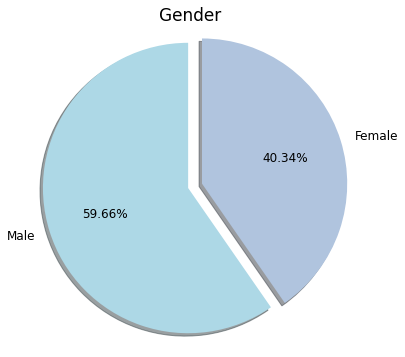

In [21]:
#Gender
fig, ax = plt.subplots(figsize=(6,6))
GenderColumn = 'Gender'
color_pie = ['lightblue','lightsteelblue']
GenderDf = df[GenderColumn].value_counts()
explode_pie = (0.05, 0.05)
ax.pie(GenderDf, labels=GenderDf.index, autopct='%1.2f%%',startangle=90, shadow = True, colors=color_pie, explode=explode_pie, textprops={'fontsize': 12})
ax.axis('equal')
fig.suptitle('Gender', y=0.92, fontsize='17')
plt.show()

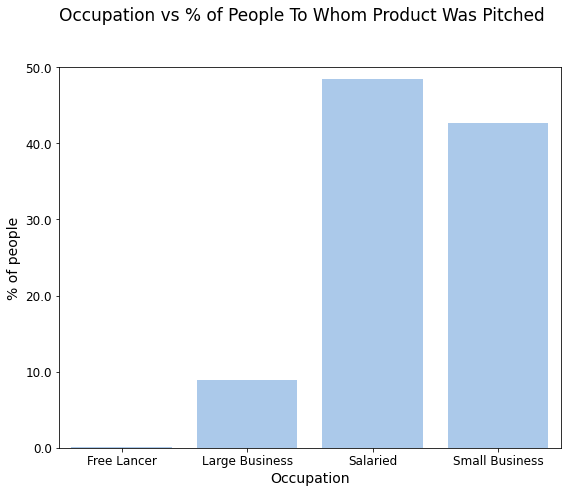

In [22]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

#Marital Status 
OccupationColumn='Occupation'
OccupationColumndf = df[OccupationColumn].value_counts().to_frame("OccupationColumnCount")
OccupationColumndf["PercentOccupationColumn"] = (OccupationColumndf["OccupationColumnCount"]/OccupationColumndf['OccupationColumnCount'].sum())*100

#Plot the Marital Status
sns.set_color_codes("pastel")
occupationplot = sns.barplot(y="PercentOccupationColumn",
            x=OccupationColumndf.index,
            data=OccupationColumndf,
            label="Occupation",
            color="b")

occupationplot.set_xlabel("Occupation", fontsize=14)
occupationplot.set_ylabel("% of people", fontsize=14)
occupationplot.set_xticklabels(labels=occupationplot.get_xticklabels(), size = 12)
occupationplot.set_yticklabels(occupationplot.get_yticks(), size = 12)

ax.set(ylim=(0,50))

f.suptitle('Occupation vs % of People To Whom Product Was Pitched', y=1, fontsize='17')
ax.grid(False)

   CityTierColumnCount  PercentCityTierColumn
1                 3190              65.261866
3                 1500              30.687398
2                  198               4.050736


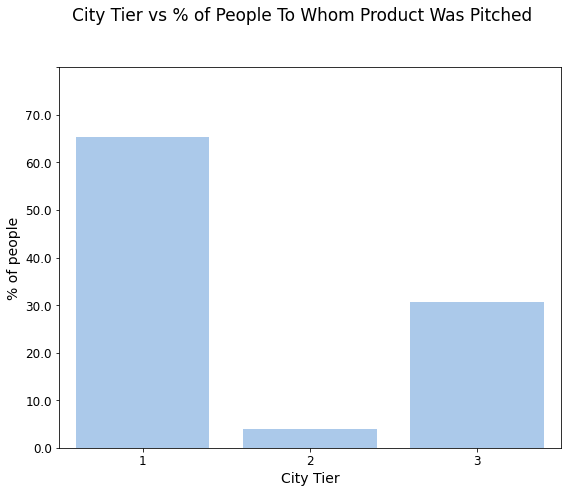

In [23]:
f, ax = plt.subplots(figsize=(9, 7))

CityTierColumn='CityTier'
CityTierColumndf = df[CityTierColumn].value_counts().to_frame("CityTierColumnCount")
CityTierColumndf["PercentCityTierColumn"] = (CityTierColumndf["CityTierColumnCount"]/CityTierColumndf['CityTierColumnCount'].sum())*100
print(CityTierColumndf)

sns.set_color_codes("pastel")
citytierplot = sns.barplot(y="PercentCityTierColumn",
            x=CityTierColumndf.index,
            data=CityTierColumndf,
            label="City Tier",
            color="b",
            )

citytierplot.set_xlabel("City Tier", fontsize=14)
citytierplot.set_ylabel("% of people", fontsize=14)

citytierplot.set_xticklabels(labels=citytierplot.get_xticklabels(), size = 12)
citytierplot.set_yticklabels(labels=citytierplot.get_yticks(), size = 12)

f.suptitle('City Tier vs % of People To Whom Product Was Pitched', y=1, fontsize='17')


ax.set(ylim=(0,80))
ax.grid(False)

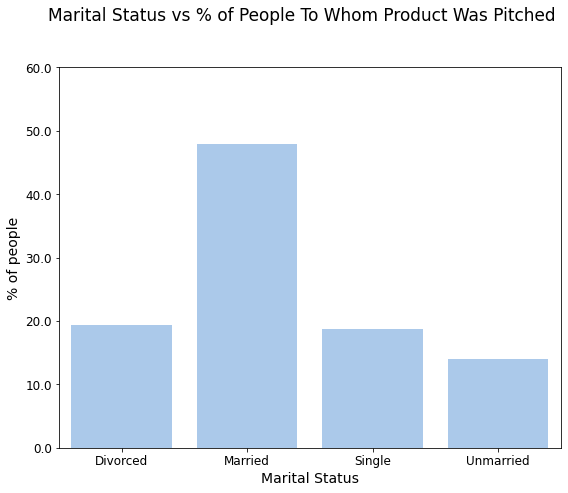

In [24]:
f, ax = plt.subplots(figsize=(9, 7))

#Marital Status 
MaritalStatusColumn='MaritalStatus'
MaritalStatusColumndf = df[MaritalStatusColumn].value_counts().to_frame("MaritalStatusCount")
MaritalStatusColumndf["PercentMaritalState"] = (MaritalStatusColumndf["MaritalStatusCount"]/MaritalStatusColumndf['MaritalStatusCount'].sum())*100

#Plot the Marital Status
sns.set_color_codes("pastel")
maritalstatusplot = sns.barplot(y="PercentMaritalState",
            x=MaritalStatusColumndf.index,
            data=MaritalStatusColumndf,
            label="Marital Status",
            color="b", )

maritalstatusplot.set_xlabel("Marital Status", fontsize=14)
maritalstatusplot.set_ylabel("% of people", fontsize=14)

maritalstatusplot.set_xticklabels(labels=maritalstatusplot.get_xticklabels(), size = 12)
maritalstatusplot.set_yticklabels(labels=maritalstatusplot.get_yticks(), size = 12)

f.suptitle('Marital Status vs % of People To Whom Product Was Pitched', y=1, fontsize='17')

ax.set(ylim=(0,60))
ax.grid(False)

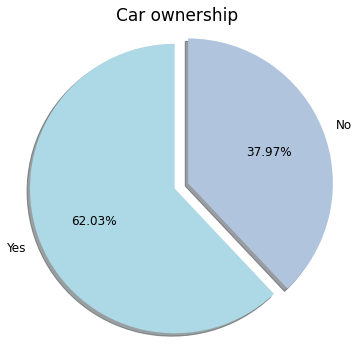

In [25]:
#Cars owned
fig, ax = plt.subplots(figsize=(6,6))
CarownedColumn = 'CarOwned'
color_pie = ['lightblue','lightsteelblue']
CarownedColumndf = df[CarownedColumn].value_counts()
explode_pie = (0.05, 0.05)
ax.pie(CarownedColumndf, labels=CarownedColumndf.index, autopct='%1.2f%%',startangle=90, shadow = True, colors=color_pie, explode=explode_pie, textprops={'fontsize': 12})
ax.axis('equal')
fig.suptitle('Car ownership', y=0.92, fontsize='17')
plt.show()

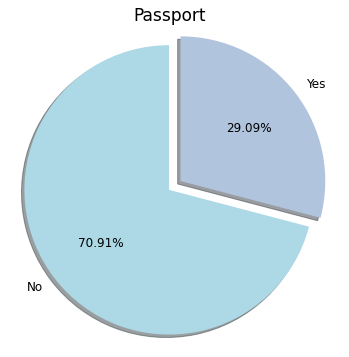

In [26]:
#Have passport
fig, ax = plt.subplots(figsize=(6,6))
PassportColumn = 'HavePassport'
colors_pie = ['lightblue','lightsteelblue']
PassportColumndf = df[PassportColumn].value_counts()
explode_pie = (0.05, 0.05)
ax.pie(PassportColumndf, labels=PassportColumndf.index, autopct='%1.2f%%',startangle=90, shadow = True, colors=colors_pie, explode=explode_pie, textprops={'fontsize': 12})
ax.axis('equal')
fig.suptitle('Passport', y=0.92, fontsize='17')
plt.show()

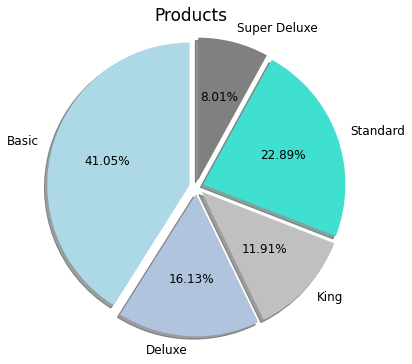

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
prod_taken = df.groupby(["ProductPitched", "ProductTaken"])["ProductTaken"].count().unstack().fillna(0)
#print(prod_taken)
prod_taken = prod_taken.div(prod_taken.sum(axis=1), axis=0)*100
Products = prod_taken.A_Yes
explode_pie = (0.05, 0.05,0.05,0.05,0.05)
color_pie = ['lightblue','lightsteelblue','silver','turquoise','grey']
ax.pie(Products, labels=Products.index, autopct='%1.2f%%',startangle=90, shadow = True, colors=color_pie, explode=explode_pie, textprops={'fontsize': 12})
ax.axis('equal')
fig.suptitle('Products', y=0.92, fontsize='17')
plt.show()

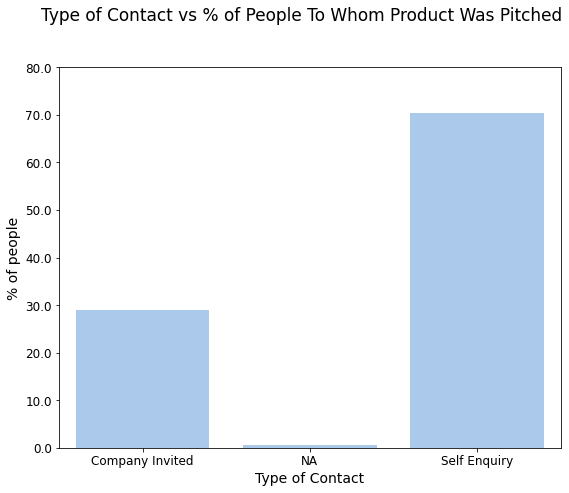

In [28]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

#Type Contact
TypeContactColumn='TypeofContact'
TypeContactColumndf = df[TypeContactColumn].value_counts().to_frame("TypeofContactCount")
TypeContactColumndf["TypeofContactpercent"] = (TypeContactColumndf["TypeofContactCount"]/TypeContactColumndf['TypeofContactCount'].sum())*100
#Plot the City Tier
sns.set_color_codes("pastel")
typeofcontactplot = sns.barplot(y="TypeofContactpercent",
            x=TypeContactColumndf.index,
            data=TypeContactColumndf,
            label="City Tier",
            color="b")

typeofcontactplot.set_xlabel("Type of Contact", fontsize=14)
typeofcontactplot.set_ylabel("% of people", fontsize=14)

typeofcontactplot.set_xticklabels(labels=typeofcontactplot.get_xticklabels(), size = 12)
typeofcontactplot.set_yticklabels(labels=typeofcontactplot.get_yticks(), size = 12)

f.suptitle('Type of Contact vs % of People To Whom Product Was Pitched', y=1, fontsize='17')

ax.set(ylim=(0,80))
ax.grid(False)

Text(0.5, 1, 'Duration of Pitch')

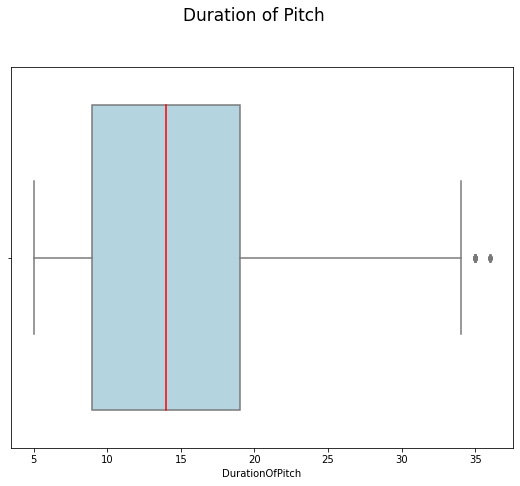

In [29]:
f, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x="DurationOfPitch",data=df,medianprops={'color':'red'},color='lightblue')
f.suptitle('Duration of Pitch', y=1, fontsize='17')

Text(0.5, 1, 'Number of Persons Visiting')

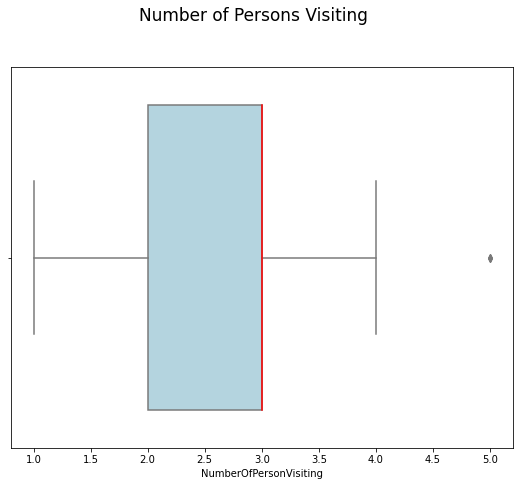

In [30]:
f, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x="NumberOfPersonVisiting",data=df,medianprops={'color':'red'},color='lightblue')
f.suptitle('Number of Persons Visiting', y=1, fontsize='17')

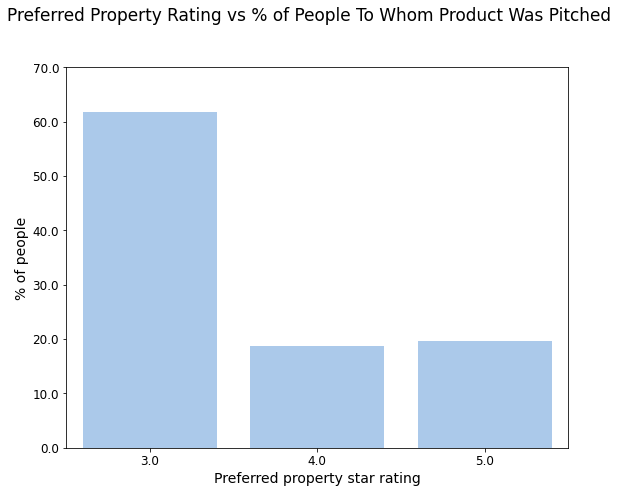

In [31]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

#Marital Status 
PreferredPropertyStarColumn='PreferredPropertyStar'
PreferredPropertyStardf = df[PreferredPropertyStarColumn].value_counts().to_frame("PreferredPropertyStarCount")
PreferredPropertyStardf["PercentPreferredPropertyStar"] = (PreferredPropertyStardf["PreferredPropertyStarCount"]/PreferredPropertyStardf['PreferredPropertyStarCount'].sum())*100

#Plot the Marital Status
sns.set_color_codes("pastel")
preferredpropstarplot = sns.barplot(y="PercentPreferredPropertyStar",
                                    x=PreferredPropertyStardf.index,
                                    data=PreferredPropertyStardf,
                                    label="Preferred property star",
                                    color="b")


preferredpropstarplot.set_xlabel("Preferred property star rating", fontsize=14)
preferredpropstarplot.set_ylabel("% of people", fontsize=14)

preferredpropstarplot.set_xticklabels(labels=preferredpropstarplot.get_xticklabels(), size = 12)
preferredpropstarplot.set_yticklabels(labels=preferredpropstarplot.get_yticks(), size = 12)

f.suptitle('Preferred Property Rating vs % of People To Whom Product Was Pitched', y=1, fontsize='17')

ax.set(ylim=(0,70))
ax.grid(False)

Text(0.5, 1, 'Number of Trips')

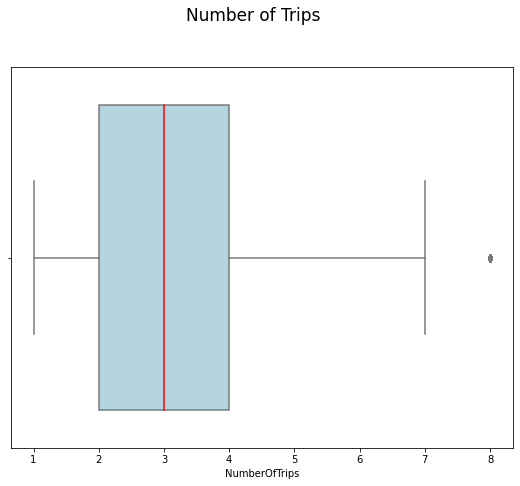

In [32]:
f, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x="NumberOfTrips",data=df,medianprops={'color':'red'},color='lightblue')
f.suptitle('Number of Trips', y=1, fontsize='17')

## ----------------------------------------------------------------------------------------------------------------------------------

## Correlation Trends

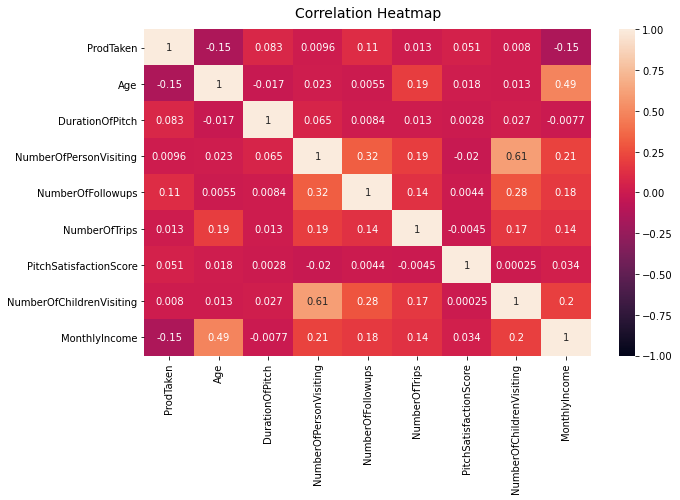

In [33]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## ----------------------------------------------------------------------------------------------------------------------------------

## Product Pitched - Segment Wise Trends

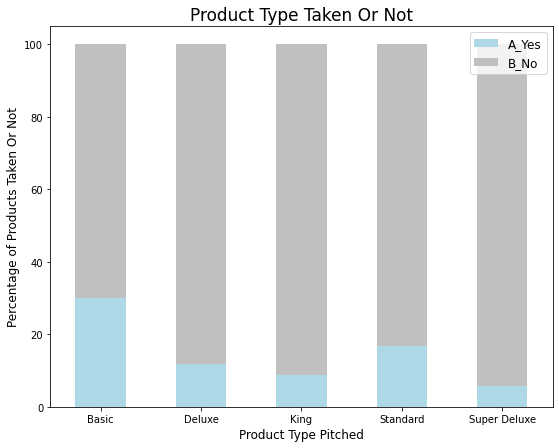

In [34]:
prod_taken = df.groupby(["ProductPitched", "ProductTaken"])["ProductTaken"].count().unstack().fillna(0)
prod_taken = prod_taken.div(prod_taken.sum(axis=1), axis=0)*100
# print(prod_taken)
prod_taken.plot(kind='bar', stacked=True, figsize=(9,7),color=['lightblue', 'silver'])
plt.title('Product Type Taken Or Not', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Products Taken Or Not', fontsize=12)
plt.xticks(rotation=0, ha='center')

plt.legend(prod_taken.columns, fontsize=12)

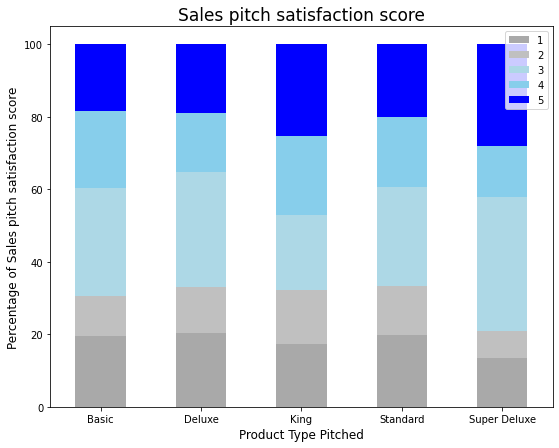

In [35]:
Pitch_Satisfaction_Score = df.groupby(["ProductPitched", "PitchSatisfactionScore"])["PitchSatisfactionScore"].count().unstack().fillna(0)
Pitch_Satisfaction_Score = Pitch_Satisfaction_Score.div(Pitch_Satisfaction_Score.sum(axis=1), axis=0)*100
Pitch_Satisfaction_Score.plot(kind='bar', stacked=True, figsize=(9,7),color=['darkgrey','silver','lightblue','skyblue','blue'])
plt.title('Sales pitch satisfaction score', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Sales pitch satisfaction score', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(Pitch_Satisfaction_Score.columns)

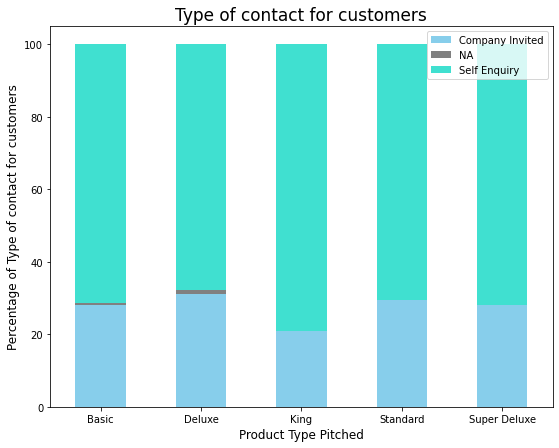

In [36]:
type_of_contact = df.groupby(["ProductPitched", "TypeofContact"])["TypeofContact"].count().unstack().fillna(0)
type_of_contact = type_of_contact.div(type_of_contact.sum(axis=1), axis=0)*100
type_of_contact.plot(kind='bar', stacked=True, figsize=(9,7),color=['skyblue','grey', 'turquoise'])
plt.title('Type of contact for customers', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Type of contact for customers', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(type_of_contact.columns,loc='upper right')

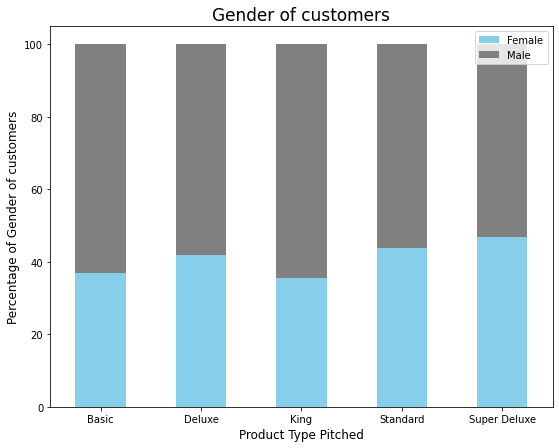

In [37]:
Gender = df.groupby(["ProductPitched", "Gender"])["Gender"].count().unstack().fillna(0)
Gender = Gender.div(Gender.sum(axis=1), axis=0)*100
Gender.plot(kind='bar', stacked=True, figsize=(9,7),color=['skyblue','grey'])
plt.title('Gender of customers', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Gender of customers', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(Gender.columns)

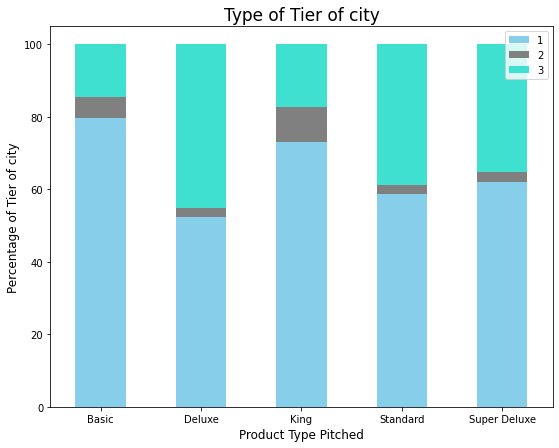

In [38]:
tier_of_city = df.groupby(["ProductPitched", "CityTier"])["CityTier"].count().unstack().fillna(0)
tier_of_city = tier_of_city.div(tier_of_city.sum(axis=1), axis=0)*100
tier_of_city.plot(kind='bar', stacked=True, figsize=(9,7),color=['skyblue','grey','turquoise'])
plt.title('Type of Tier of city', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Tier of city', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(tier_of_city.columns)

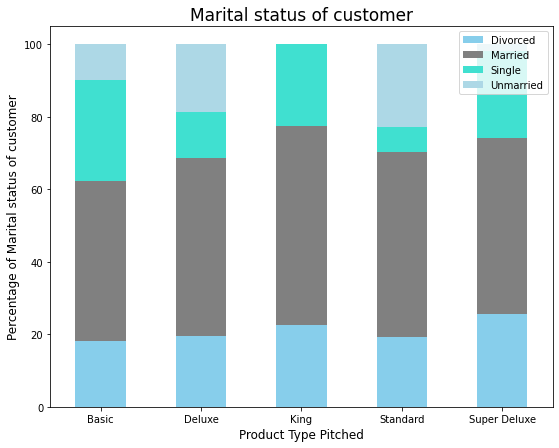

In [39]:
Marital_Status = df.groupby(["ProductPitched", "MaritalStatus"])["MaritalStatus"].count().unstack().fillna(0)
Marital_Status = Marital_Status.div(Marital_Status.sum(axis=1), axis=0)*100
Marital_Status.plot(kind='bar', stacked=True, figsize=(9,7),color=['skyblue','grey','turquoise','lightblue'])
plt.title('Marital status of customer', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Marital status of customer', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(Marital_Status.columns,loc='upper right')

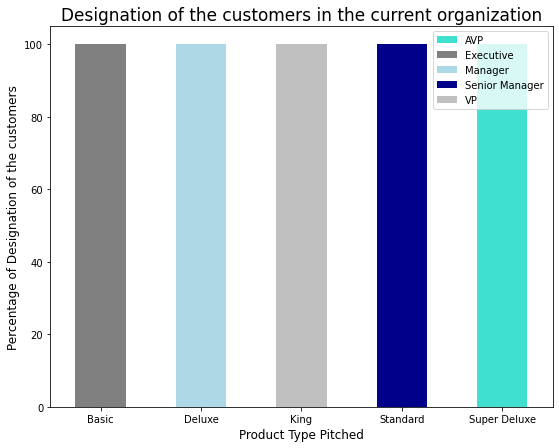

In [40]:
Designation = df.groupby(["ProductPitched", "Designation"])["Designation"].count().unstack().fillna(0)
Designation = Designation.div(Designation.sum(axis=1), axis=0)*100
Designation.plot(kind='bar', stacked=True, figsize=(9,7),color=['turquoise','grey','lightblue','darkblue','silver'])
plt.title('Designation of the customers in the current organization', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Designation of the customers', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(Designation.columns)

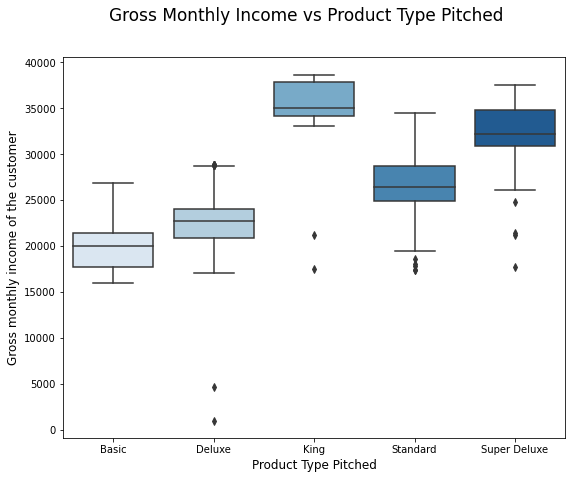

In [41]:
fig2, ax2 = plt.subplots(figsize=(9,7))
ax2 = sns.boxplot(x="ProductPitched", y="MonthlyIncome", data=df, palette='Blues')
plt.ylabel('Gross monthly income of the customer', fontsize=12)
plt.xlabel('Product Type Pitched', fontsize=12)
fig2.suptitle('Gross Monthly Income vs Product Type Pitched', fontsize='17')
plt.show()

## ----------------------------------------------------------------------------------------------------------------------------------

## Product Taken - Segment Wise Trends

In [42]:
groupings = df.copy()

In [43]:
age_conditions = [
    (groupings['Age'] >= 15) & (groupings['Age'] < 30),
    (groupings['Age'] >= 30) & (groupings['Age'] < 45),
    (groupings['Age'] >= 45) & (groupings['Age'] < 60),
    (groupings['Age'] >= 60)
    ]
age_values = ['15-30', '30-45', '45-60', '60+']
groupings['AgeGroup'] = np.select(age_conditions, age_values)

In [44]:
income_conditions = [
    (groupings['MonthlyIncome'] < 15000),
    (groupings['MonthlyIncome'] >= 15000) & (groupings['MonthlyIncome'] < 30000),
    (groupings['MonthlyIncome'] >= 30000)
    ]
income_values = ['<15k', '15-30k', '30k+']
groupings['IncomeGroup'] = np.select(income_conditions, income_values)

In [45]:
pitch_conditions = [
    (groupings['PitchSatisfactionScore'] <= 2),
    (groupings['PitchSatisfactionScore'] >= 3)
    ]
pitch_values = ['<=2', '>=3']
groupings['PitchScoreGroup'] = np.select(pitch_conditions, pitch_values)

In [46]:
groupings[['AgeGroup','IncomeGroup', 'PitchScoreGroup']] = groupings[['AgeGroup','IncomeGroup', 'PitchScoreGroup']].astype('category')

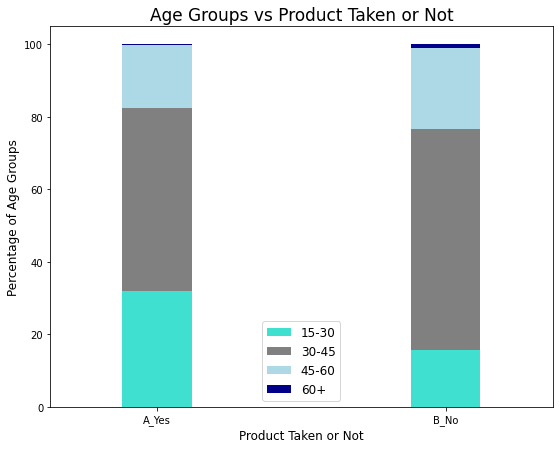

In [47]:
age_groups = groupings.groupby(["ProductTaken", "AgeGroup"])["AgeGroup"].count().unstack().fillna(0)
age_groups = age_groups.div(age_groups.sum(axis=1), axis=0)*100
age_groups.plot(kind='bar', stacked=True, figsize=(9,7),width=0.24, 
                color=['turquoise','grey','lightblue','darkblue','silver'])
plt.title('Age Groups vs Product Taken or Not', fontsize=17)
plt.xlabel('Product Taken or Not', fontsize=12)
plt.ylabel('Percentage of Age Groups', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(age_groups.columns, fontsize=12)

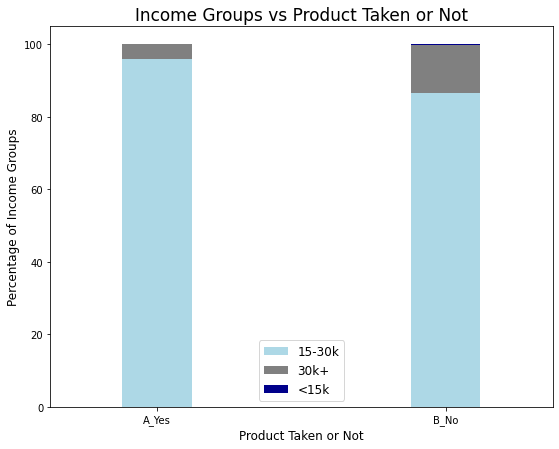

In [48]:
income_groups = groupings.groupby(["ProductTaken", "IncomeGroup"])["IncomeGroup"].count().unstack().fillna(0)
income_groups = income_groups.div(income_groups.sum(axis=1), axis=0)*100
income_groups.plot(kind='bar', stacked=True, figsize=(9,7),width=0.24,color=['lightblue','grey','darkblue'])
plt.title('Income Groups vs Product Taken or Not', fontsize=17)
plt.xlabel('Product Taken or Not', fontsize=12)
plt.ylabel('Percentage of Income Groups', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(income_groups.columns, fontsize=12)

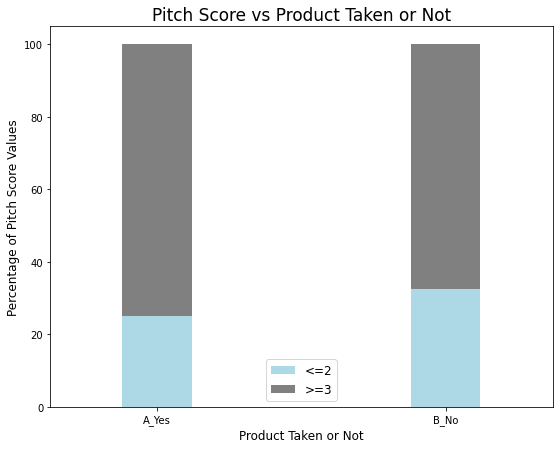

In [49]:
pitch_score_groups = groupings.groupby(["ProductTaken", "PitchScoreGroup"])["PitchScoreGroup"].count().unstack().fillna(0)
pitch_score_groups = pitch_score_groups.div(pitch_score_groups.sum(axis=1), axis=0)*100
pitch_score_groups.plot(kind='bar', stacked=True, figsize=(9,7), width = 0.24, color=['lightblue','grey'])
plt.title('Pitch Score vs Product Taken or Not', fontsize=17)
plt.xlabel('Product Taken or Not', fontsize=12)
plt.ylabel('Percentage of Pitch Score Values', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(pitch_score_groups.columns, fontsize=12)

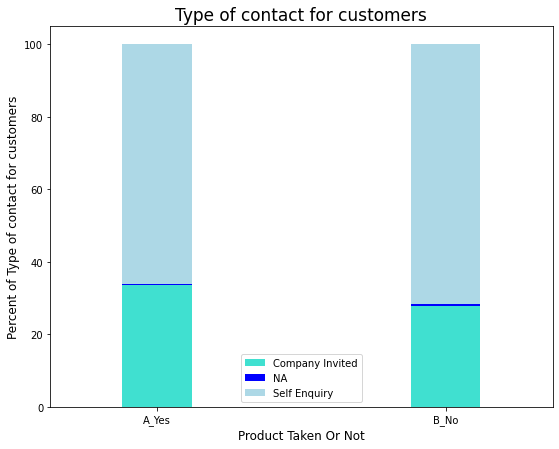

In [50]:
contact_type = df.groupby(["ProductTaken", "TypeofContact"])["TypeofContact"].count().unstack().fillna(0)
contact_type = contact_type.div(contact_type.sum(axis=1), axis=0)*100
contact_type.plot(kind='bar', stacked=True, figsize=(9,7), width= 0.24, color=['turquoise','blue','lightblue'])
plt.xticks(rotation=0, ha='center')
plt.title('Type of contact for customers', fontsize=17)
plt.ylabel('Percent of Type of contact for customers', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(contact_type.columns);

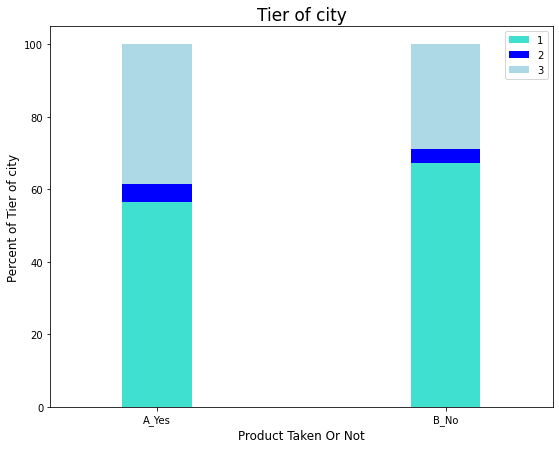

In [51]:
city_tier = df.groupby(["ProductTaken", "CityTier"])["CityTier"].count().unstack().fillna(0)
city_tier = city_tier.div(city_tier.sum(axis=1), axis=0)*100
city_tier.plot(kind='bar', stacked=True, figsize=(9,7), width= 0.24, color=['turquoise','blue','lightblue'])
plt.xticks(rotation=0, ha='center')
plt.title('Tier of city', fontsize=17)
plt.ylabel('Percent of Tier of city', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(city_tier.columns);

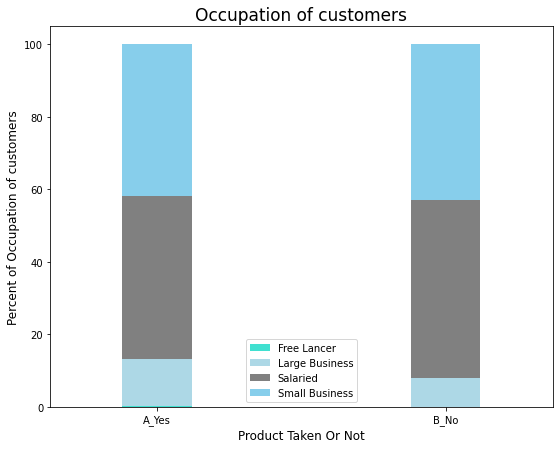

In [52]:
occupation = df.groupby(["ProductTaken", "Occupation"])["Occupation"].count().unstack().fillna(0)
occupation = occupation.div(occupation.sum(axis=1), axis=0)*100
occupation.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, color=['turquoise','lightblue','grey','skyblue'])
plt.xticks(rotation=0, ha='center')
plt.title('Occupation of customers', fontsize=17)
plt.ylabel('Percent of Occupation of customers', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(occupation.columns);

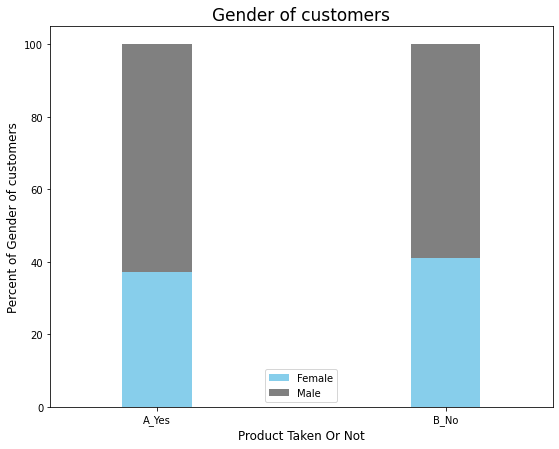

In [53]:
gender = df.groupby(["ProductTaken", "Gender"])["Gender"].count().unstack().fillna(0)
gender = gender.div(gender.sum(axis=1), axis=0)*100
gender.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, color=['skyblue','grey'])
plt.xticks(rotation=0, ha='center')
plt.title('Gender of customers', fontsize=17)
plt.ylabel('Percent of Gender of customers', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(gender.columns);

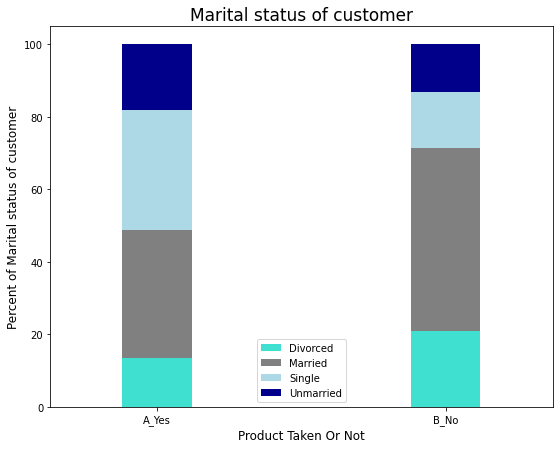

In [54]:
marital_status = df.groupby(["ProductTaken", "MaritalStatus"])["MaritalStatus"].count().unstack().fillna(0)
marital_status = marital_status.div(marital_status.sum(axis=1), axis=0)*100
marital_status.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, 
                    color=['turquoise','grey','lightblue','darkblue'])
plt.xticks(rotation=0, ha='center')
plt.title('Marital status of customer', fontsize=17)
plt.ylabel('Percent of Marital status of customer', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(marital_status.columns);

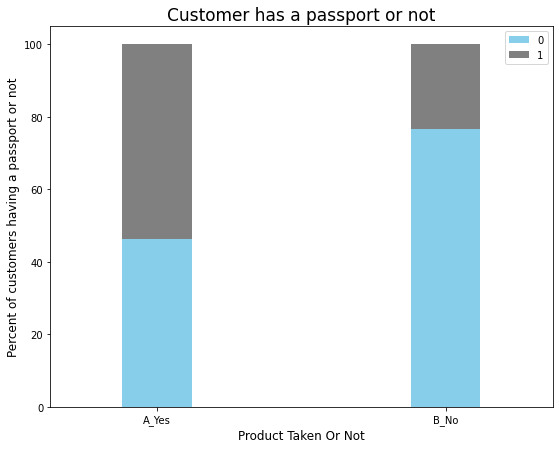

In [55]:
passport = df.groupby(["ProductTaken", "Passport"])["Passport"].count().unstack().fillna(0)
passport = passport.div(passport.sum(axis=1), axis=0)*100
passport.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, color=['skyblue','grey'])
plt.xticks(rotation=0, ha='center')
plt.title('Customer has a passport or not', fontsize=17)
plt.ylabel('Percent of customers having a passport or not', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(passport.columns);

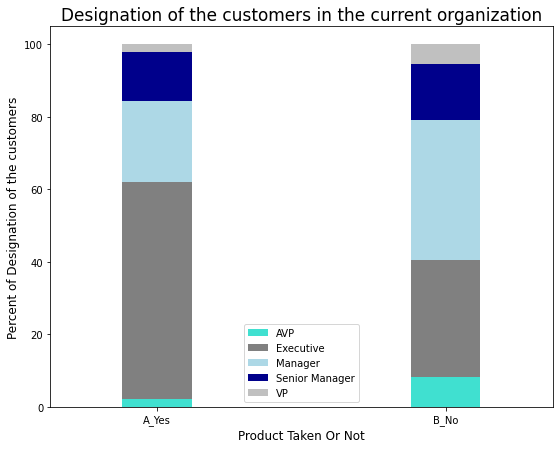

In [56]:
designation = df.groupby(["ProductTaken", "Designation"])["Designation"].count().unstack().fillna(0)
designation = designation.div(designation.sum(axis=1), axis=0)*100

designation.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, 
                 color=['turquoise','grey','lightblue','darkblue','silver'])
plt.xticks(rotation=0, ha='center')
plt.title('Designation of the customers in the current organization', fontsize=17)
plt.ylabel('Percent of Designation of the customers', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(designation.columns);

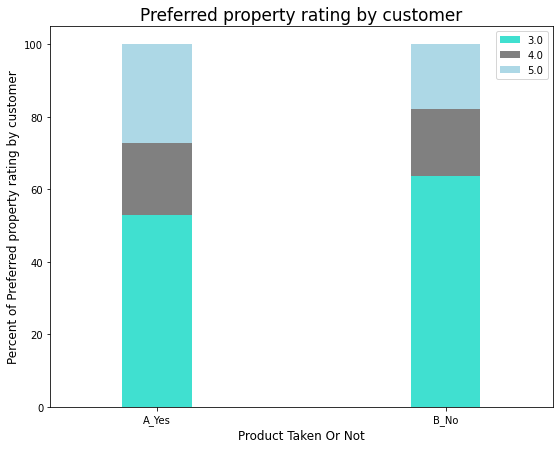

In [57]:
property_star = df.groupby(["ProductTaken", "PreferredPropertyStar"])["PreferredPropertyStar"].count().unstack().fillna(0)
property_star = property_star.div(property_star.sum(axis=1), axis=0)*100
property_star.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, color=['turquoise','grey','lightblue'])
plt.xticks(rotation=0, ha='center')
plt.title('Preferred property rating by customer', fontsize=17)
plt.ylabel('Percent of Preferred property rating by customer', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(property_star.columns);

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Modeling

## Splitting Data into Tain and Test Sets 

In [58]:
all_features = ['TypeofContact', 'CityTier', 'Occupation', 
        'Gender', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'HavePassport', 'CarOwned', 'Designation',
        'Age', 'PitchSatisfactionScore',
        'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
        'NumberOfTrips', 'NumberOfChildrenVisiting','MonthlyIncome']

In [59]:
X_df = df[all_features].copy()
y_df = df[['ProductTaken']].copy()

X = df[all_features].values
y = df[['ProductTaken']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Encoding categorical data and output data

In [60]:
ordinalencoder = OrdinalEncoder()

X_train[:,0:10] = ordinalencoder.fit_transform(X_train[:,0:10])

X_test[:,0:10] = ordinalencoder.transform(X_test[:,0:10])

sc = StandardScaler()

X_train[:,10:] = sc.fit_transform(X_train[:,10:])

X_test[:,10:] = sc.transform(X_test[:,10:])

In [61]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)

## Modeling using Random Forest and Selecting Important Features

In [62]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

In [63]:
important_features = pd.Series(rf_classifier.feature_importances_, index = X_df.columns, name = "Important Features").sort_values(ascending=False)

In [64]:
print(important_features)

MonthlyIncome               0.133731
Age                         0.126781
DurationOfPitch             0.110980
HavePassport                0.077445
NumberOfTrips               0.061615
PitchSatisfactionScore      0.058680
MaritalStatus               0.056274
NumberOfFollowups           0.050615
PreferredPropertyStar       0.046676
ProductPitched              0.045392
Occupation                  0.040635
CityTier                    0.036993
Designation                 0.030729
NumberOfChildrenVisiting    0.028378
NumberOfPersonVisiting      0.027897
Gender                      0.024208
TypeofContact               0.023642
CarOwned                    0.019330
Name: Important Features, dtype: float64


# Predictive Modeling using XGBoost with selected Features

In [65]:
selected_features = ['CityTier', 'Occupation', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'HavePassport', 'Designation',
        'Age', 'NumberOfFollowups','MonthlyIncome']

## Splitting Data into Tain and Test Sets 

In [66]:
X_df = df[selected_features].copy()
y_df = df[['ProductTaken']].copy()

X = df[selected_features].values
y = df[['ProductTaken']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Encoding categorical data and output data

In [67]:
ordinalencoder = OrdinalEncoder()

X_train[:,0:7] = ordinalencoder.fit_transform(X_train[:,0:7])

X_test[:,0:7] = ordinalencoder.transform(X_test[:,0:7])

sc = StandardScaler()

X_train[:,7:] = sc.fit_transform(X_train[:,7:])

X_test[:,7:] = sc.transform(X_test[:,7:])

le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)

## Creating and Predicting using XGBoost

In [68]:
xgbmodel = XGBClassifier(eval_metric='error')
xgbmodel.fit(X_train, y_train)

y_pred = xgbmodel.predict(X_test)

## Measuring Model Performance

In [69]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
print("Accuracy Score : {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix : 
 [[100  80]
 [ 12 786]]
Accuracy Score : 90.593%


In [73]:
print("AUC Score : {:.3f}%".format(roc_auc_score(y_test, y_pred)))

AUC Score : 0.770%


## Measuring Model Performance After 10-fold Cross-Validation

In [70]:
accuracies = cross_val_score(estimator = xgbmodel, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.82 %
Standard Deviation: 1.10 %


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# APPENDIX

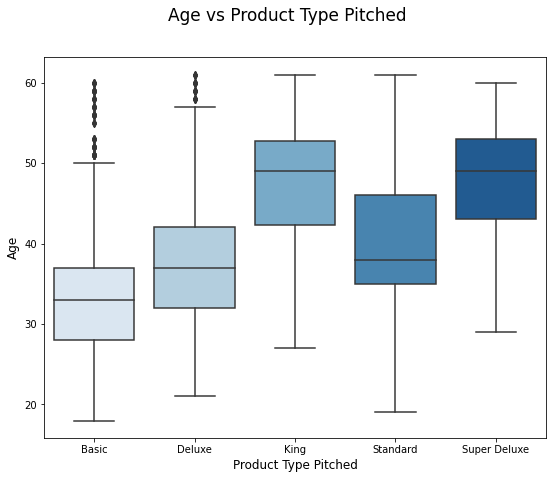

In [70]:
fig2, ax2 = plt.subplots(figsize=(9,7))
ax2 = sns.boxplot(x="ProductPitched", y="Age", data=df, palette='Blues')
plt.ylabel('Age', fontsize=12)
plt.xlabel('Product Type Pitched', fontsize=12)
fig2.suptitle('Age vs Product Type Pitched', fontsize='17')
plt.show()

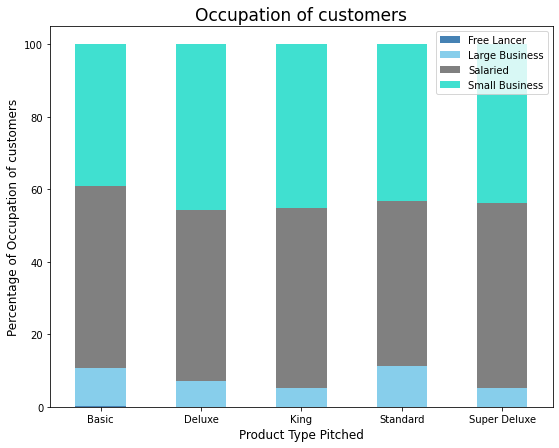

In [71]:
Occupation = df.groupby(["ProductPitched", "Occupation"])["Occupation"].count().unstack().fillna(0)
Occupation = Occupation.div(Occupation.sum(axis=1), axis=0)*100
Occupation.plot(kind='bar', stacked=True, figsize=(9,7),color=['steelblue','skyblue','grey','turquoise'])
plt.title('Occupation of customers', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Occupation of customers', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(Occupation.columns)

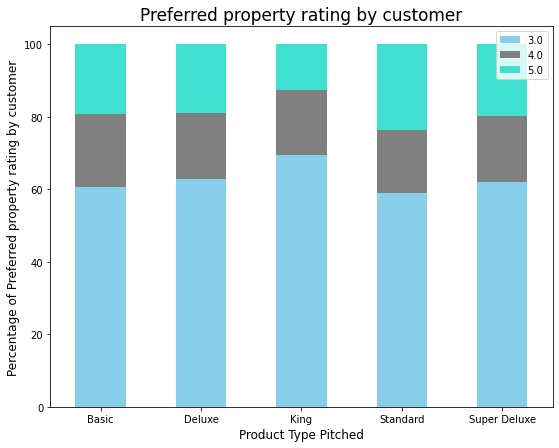

In [72]:
preferred_property_star = df.groupby(["ProductPitched", "PreferredPropertyStar"])["PreferredPropertyStar"].count().unstack().fillna(0)
preferred_property_star = preferred_property_star.div(preferred_property_star.sum(axis=1), axis=0)*100
preferred_property_star.plot(kind='bar', stacked=True, figsize=(9,7),color=['skyblue','grey','turquoise'])
plt.title('Preferred property rating by customer', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Preferred property rating by customer', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(preferred_property_star.columns)

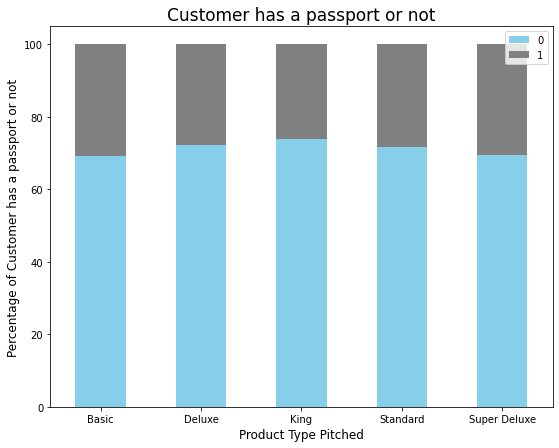

In [73]:
Passport = df.groupby(["ProductPitched", "Passport"])["Passport"].count().unstack().fillna(0)
Passport = Passport.div(Passport.sum(axis=1), axis=0)*100
Passport.plot(kind='bar', stacked=True, figsize=(9,7),color=['skyblue','grey'])
plt.title('Customer has a passport or not', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of Customer has a passport or not', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(Passport.columns,loc='upper right')

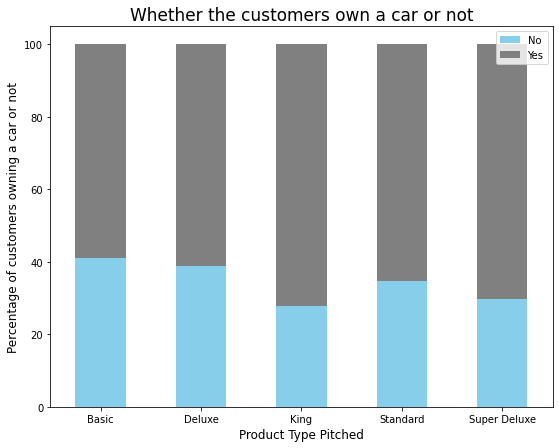

In [74]:
owned_car = df.groupby(["ProductPitched", "CarOwned"])["CarOwned"].count().unstack().fillna(0)
owned_car = owned_car.div(owned_car.sum(axis=1), axis=0)*100
owned_car.plot(kind='bar', stacked=True, figsize=(9,7),color=['skyblue','grey'])
plt.title('Whether the customers own a car or not', fontsize=17)
plt.xlabel('Product Type Pitched', fontsize=12)
plt.ylabel('Percentage of customers owning a car or not', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(owned_car.columns)

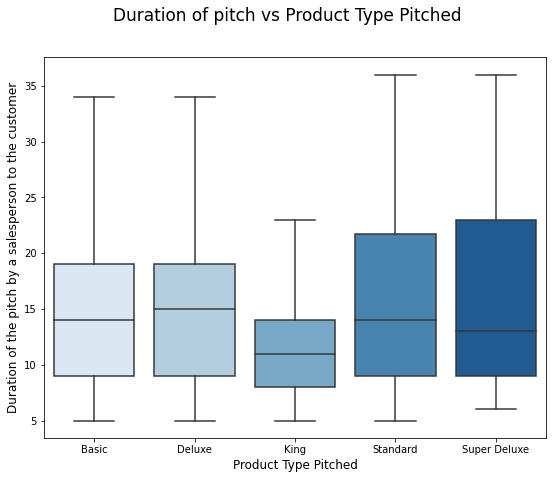

In [75]:
fig2, ax2 = plt.subplots(figsize=(9,7))
ax2 = sns.boxplot(x="ProductPitched", y="DurationOfPitch", data=df,palette='Blues')
plt.ylabel('Duration of the pitch by a salesperson to the customer', fontsize=12)
plt.xlabel('Product Type Pitched', fontsize=12)
fig2.suptitle('Duration of pitch vs Product Type Pitched', fontsize='17')
plt.show()

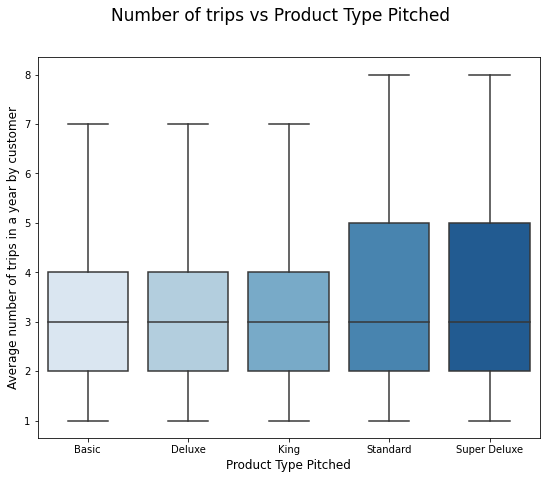

In [76]:
fig2, ax2 = plt.subplots(figsize=(9,7))
ax2 = sns.boxplot(x="ProductPitched", y="NumberOfTrips", data=df,palette='Blues')
plt.ylabel('Average number of trips in a year by customer', fontsize=12)
plt.xlabel('Product Type Pitched', fontsize=12)
fig2.suptitle('Number of trips vs Product Type Pitched', fontsize='17')
plt.show()

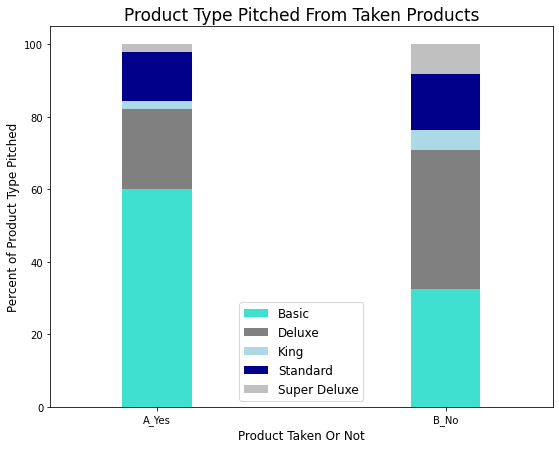

In [77]:
prod_pitched = df.groupby(["ProductTaken", "ProductPitched"])["ProductPitched"].count().unstack().fillna(0)
prod_pitched = prod_pitched.div(prod_pitched.sum(axis=1), axis=0)*100
prod_pitched.plot(kind='bar', stacked=True, figsize=(9,7), width= 0.24, color=['turquoise','grey','lightblue','darkblue','silver'])
plt.xticks(rotation=0, ha='center')
plt.title('Product Type Pitched From Taken Products', fontsize=17)
plt.ylabel('Percent of Product Type Pitched', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(prod_pitched.columns, fontsize=12)

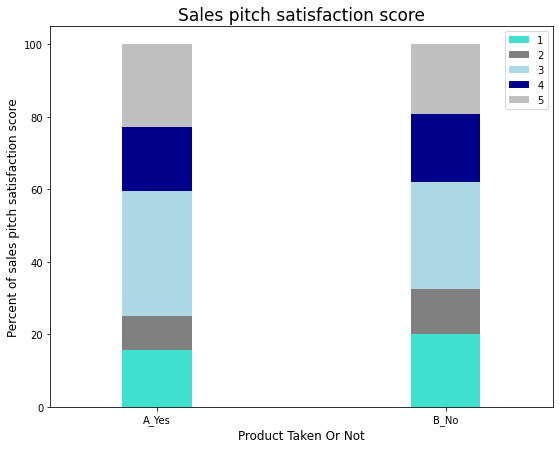

In [78]:
pitch_satisfaction_score = df.groupby(["ProductTaken", "PitchSatisfactionScore"])["PitchSatisfactionScore"].count().unstack().fillna(0)
pitch_satisfaction_score = pitch_satisfaction_score.div(pitch_satisfaction_score.sum(axis=1), axis=0)*100
pitch_satisfaction_score.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, color=['turquoise','grey','lightblue','darkblue','silver'])
plt.xticks(rotation=0, ha='center')
plt.title('Sales pitch satisfaction score', fontsize=17)
plt.ylabel('Percent of sales pitch satisfaction score', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(pitch_satisfaction_score.columns)

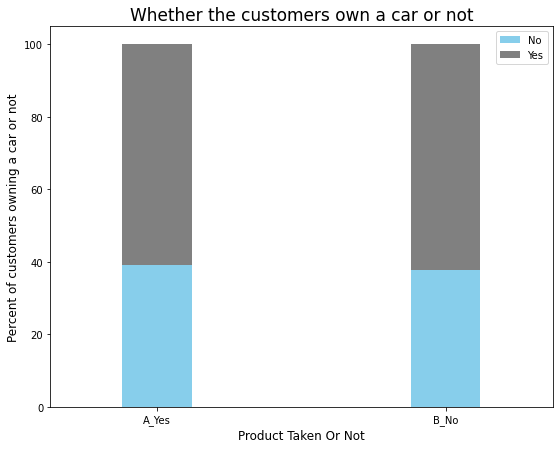

In [79]:
own_car = df.groupby(["ProductTaken", "CarOwned"])["CarOwned"].count().unstack().fillna(0)
own_car = own_car.div(own_car.sum(axis=1), axis=0)*100
own_car.plot(kind='bar', stacked=True, figsize=(9,7),width= 0.24, color=['skyblue','grey','lightblue'])
plt.xticks(rotation=0, ha='center')
plt.title('Whether the customers own a car or not', fontsize=17)
plt.ylabel('Percent of customers owning a car or not', fontsize=12)
plt.xlabel('Product Taken Or Not', fontsize=12)
plt.legend(own_car.columns)

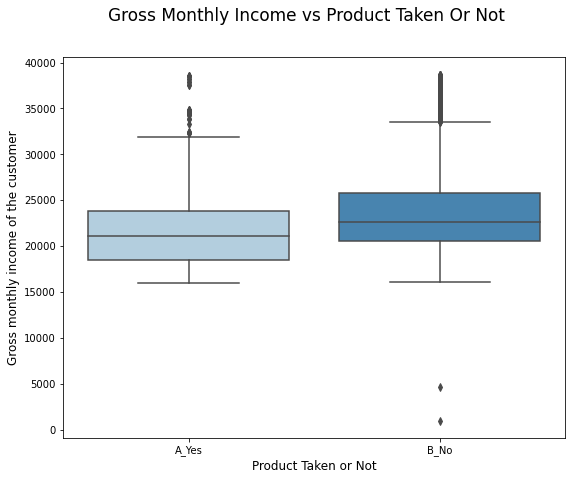

In [80]:
fig2, ax2 = plt.subplots(figsize=(9,7))
ax2 = sns.boxplot(x="ProductTaken", y="MonthlyIncome", data=df,palette='Blues')
plt.ylabel('Gross monthly income of the customer', fontsize=12)
plt.xlabel('Product Taken or Not', fontsize=12)
fig2.suptitle('Gross Monthly Income vs Product Taken Or Not', fontsize='17')
plt.show()

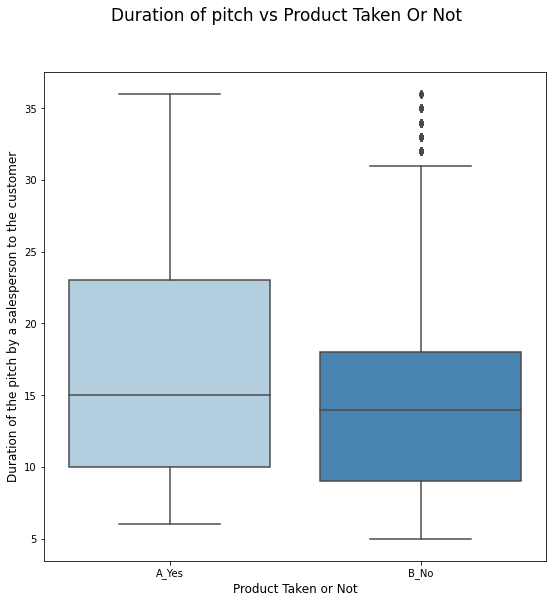

In [81]:
fig2, ax2 = plt.subplots(figsize=(9,9))
ax2 = sns.boxplot(x="ProductTaken", y="DurationOfPitch", data=df,palette='Blues')
plt.ylabel('Duration of the pitch by a salesperson to the customer', fontsize=12)
plt.xlabel('Product Taken or Not', fontsize=12)
fig2.suptitle('Duration of pitch vs Product Taken Or Not', fontsize='17')
plt.show()

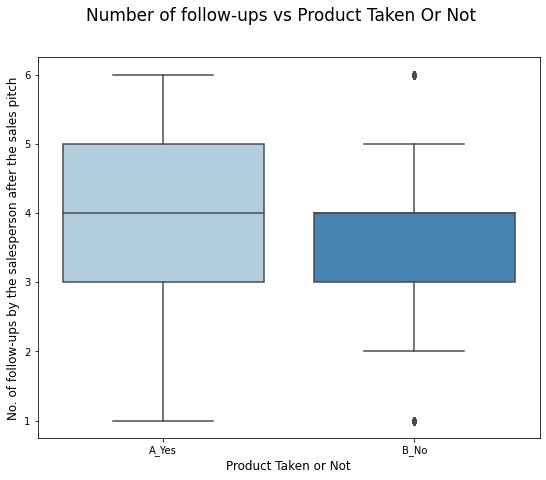

In [82]:
fig2, ax2 = plt.subplots(figsize=(9,7))
ax2 = sns.boxplot(x="ProductTaken", y="NumberOfFollowups", data=df,palette='Blues')
plt.ylabel('No. of follow-ups by the salesperson after the sales pitch', fontsize=12)
plt.xlabel('Product Taken or Not', fontsize=12)
fig2.suptitle('Number of follow-ups vs Product Taken Or Not', fontsize='17')
plt.show()